# Time Series analysis using ARMA model for forecasting number of new customers for next 3 years 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose


# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
date = pd.read_csv("retention_year_customers.csv")
date

,reviewerID,first_order_year,last_order_year,no_of_years
0,A1DEHPRSH4BF2P,1998,2013,15
1,A3GYHXLVWTTDV9,1998,2005,7
2,AXWEQGFMF317A,1998,2001,3
3,A2RROM9KCYOYHJ,1998,2000,2
4,A2MIXSIPW7WKT8,1998,1998,0
...,...,...,...,...
178524,A1WF5U85E3T10G,2018,2018,0
178525,ALGEZHAH9OKXA,2018,2018,0
178526,A303SNZ4AR7TDQ,2018,2018,0
178527,A1LCIBTCBBVMTK,2018,2018,0


In [3]:
yrs = [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
tot = []
ret = []
retper = []
a = int
b = int
c = int
for i in yrs:
    a = date.reviewerID[(date.first_order_year == i)].count()
    tot.append(a)

    b = date.reviewerID[(date.first_order_year == i) & (date.last_order_year == 2018)].count()
    ret.append(b)
    
    c = round(((b/a) * 100),2)
    retper.append(c)
    
print(ret)
print(tot)
print(retper)
    

[1, 10, 24, 32, 38, 35, 35, 66, 114, 221, 240, 331, 443, 648, 1098, 2666, 3879, 4990, 5156, 3933]
[59, 278, 686, 774, 875, 937, 958, 1589, 2190, 3728, 3841, 4544, 4873, 6589, 11414, 25443, 32638, 35381, 25886, 12489]
[1.69, 3.6, 3.5, 4.13, 4.34, 3.74, 3.65, 4.15, 5.21, 5.93, 6.25, 7.28, 9.09, 9.83, 9.62, 10.48, 11.88, 14.1, 19.92, 31.49]


In [4]:
retention = pd.DataFrame()
retention["year"] = yrs 
retention["No. of new customers"] = tot
retention['No of customers retained'] = ret
retention['Percentage of retention'] = retper
retention

,year,No. of new customers,No of customers retained,Percentage of retention
0,1998,59,1,1.69
1,1999,278,10,3.60
2,2000,686,24,3.50
3,2001,774,32,4.13
4,2002,875,38,4.34
5,2003,937,35,3.74
6,2004,958,35,3.65
7,2005,1589,66,4.15
8,2006,2190,114,5.21
9,2007,3728,221,5.93


In [5]:
retention.set_index('year',inplace = True)
retention

,No. of new customers,No of customers retained,Percentage of retention
year,,,
1998,59,1,1.69
1999,278,10,3.60
2000,686,24,3.50
2001,774,32,4.13
2002,875,38,4.34
2003,937,35,3.74
2004,958,35,3.65
2005,1589,66,4.15
2006,2190,114,5.21


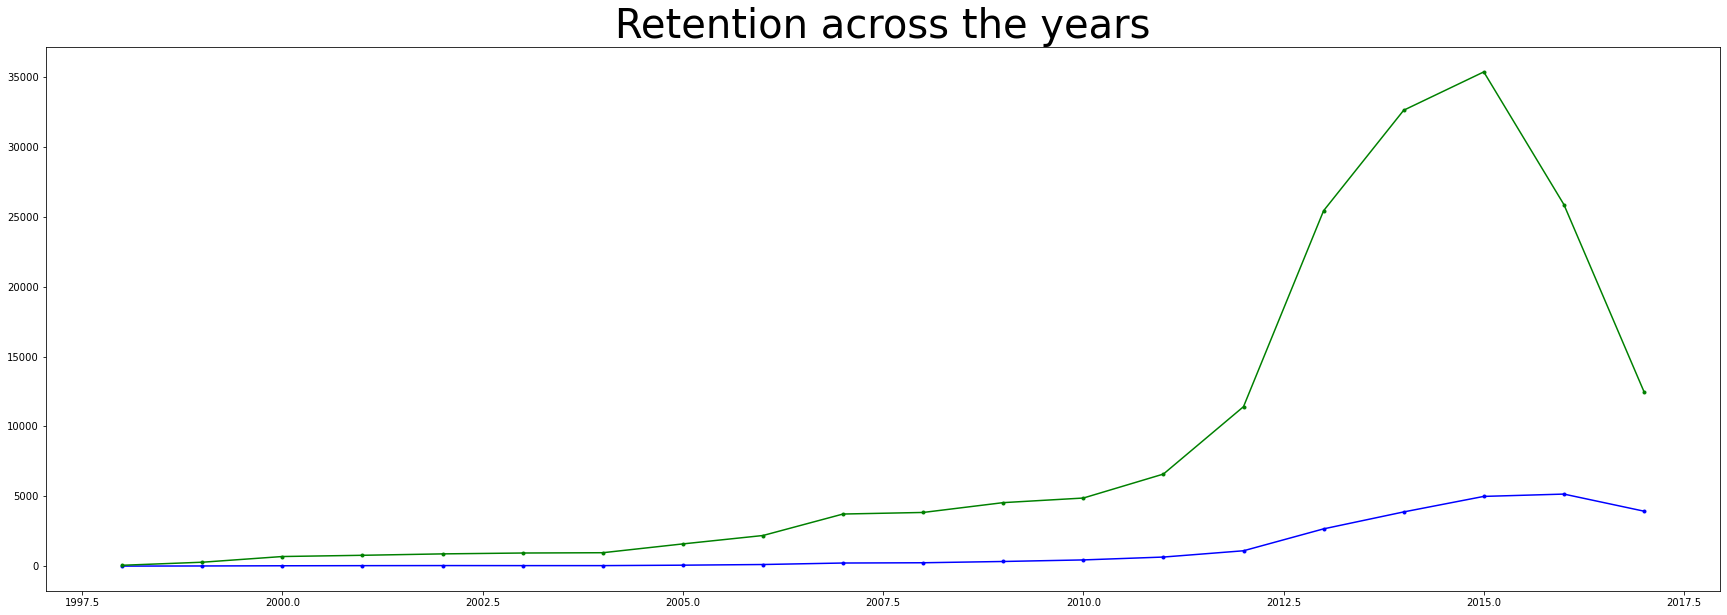

In [6]:
plt.figure(figsize=(30,10))
plt.title("Retention across the years", size = 40)
plt.plot(retention['No of customers retained'], color = 'b', marker = '.')
plt.plot(retention['No. of new customers'], color = 'g', marker = '.')
# plt.plot(retention['Percentage of retention'], color = 'r', marker = '.')



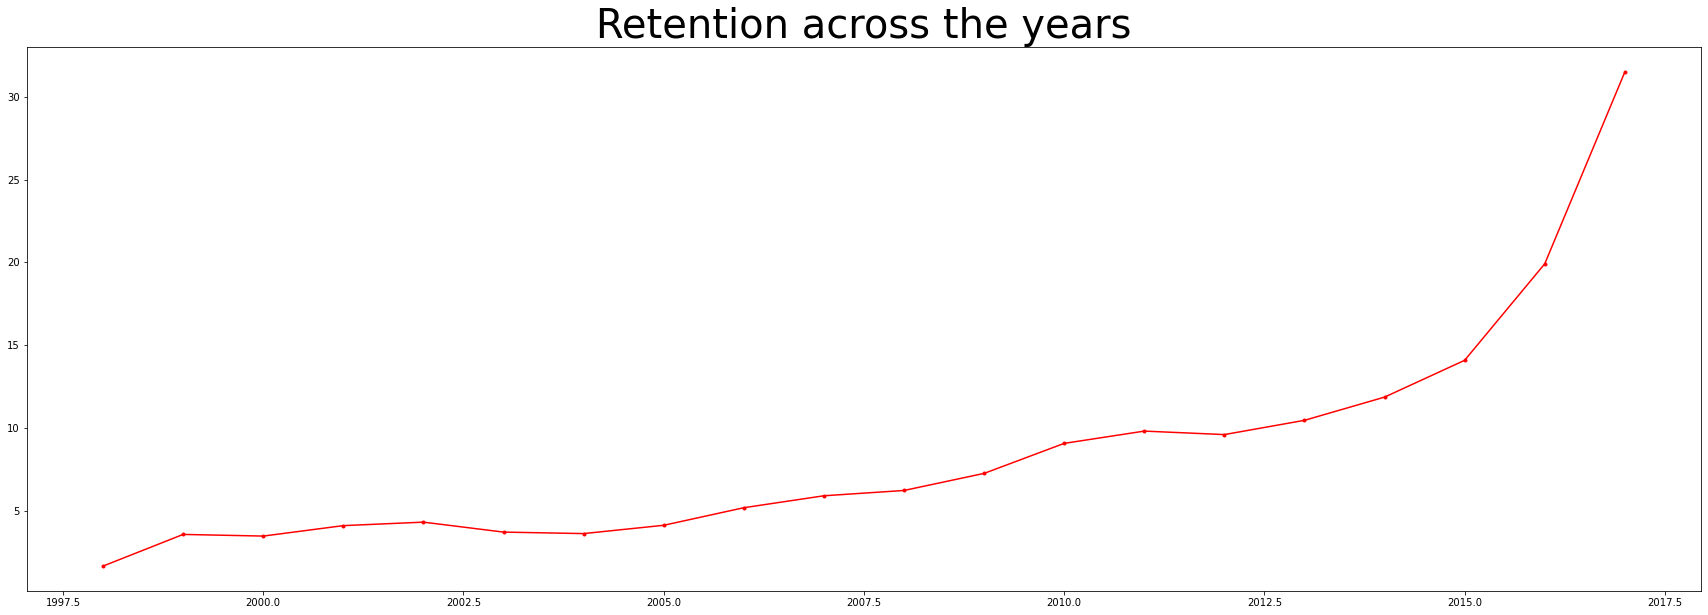

In [7]:
plt.figure(figsize=(30,10))
plt.title("Retention across the years", size = 40)
plt.plot(retention['Percentage of retention'], color = 'r', marker = '.')



In [8]:
reten = retention['No. of new customers']
reten

year
1998       59
1999      278
2000      686
2001      774
2002      875
2003      937
2004      958
2005     1589
2006     2190
2007     3728
2008     3841
2009     4544
2010     4873
2011     6589
2012    11414
2013    25443
2014    32638
2015    35381
2016    25886
2017    12489
Name: No. of new customers, dtype: int64

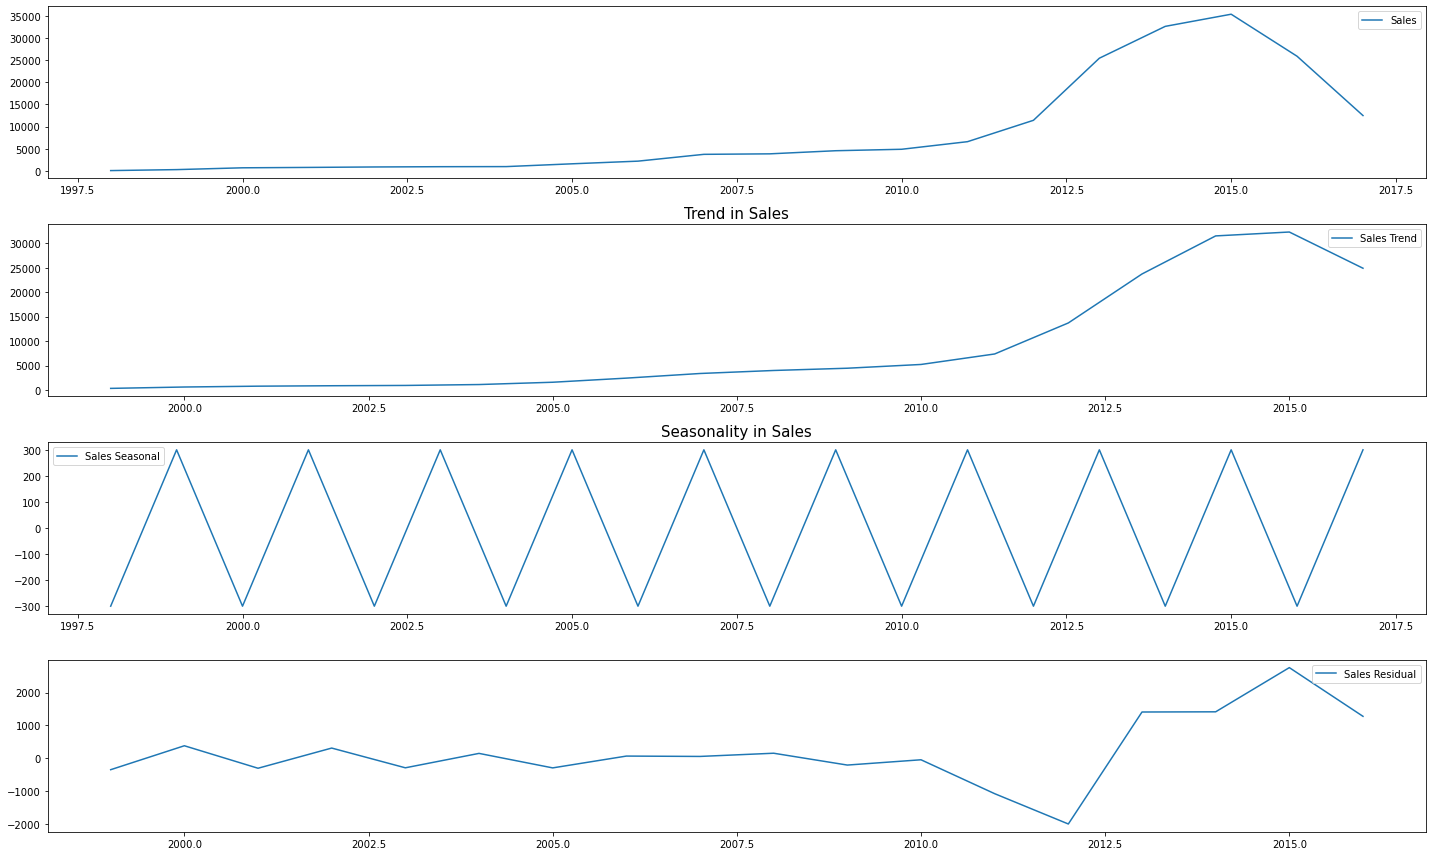

In [10]:
decomposition = seasonal_decompose(reten, period = 2)
decomposition
d_trend = decomposition.trend 
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(reten,label='Sales')
plt.legend(loc='best')

plt.subplot(412)
plt.title("Trend in Sales",size = 15)
plt.plot(d_trend,label='Sales Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.title("Seasonality in Sales",size = 15)
plt.plot(d_seasonal,label='Sales Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Sales Residual')
plt.legend(loc='best')

plt.tight_layout()

In [11]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make is stationary"
        
    return(ret)

In [12]:
checkStationarity(reten)

1.0


'Data is not Stationary. Make is stationary'

In [13]:
diff_reten= reten - reten.shift(8)

In [14]:
diff_reten.dropna(inplace=True)

In [15]:
checkStationarity(diff_reten)

0.02986542044778115


'Data is Stationary. Proceed to model building'

In [16]:
diff_reten

year
2006     2131.0
2007     3450.0
2008     3155.0
2009     3770.0
2010     3998.0
2011     5652.0
2012    10456.0
2013    23854.0
2014    30448.0
2015    31653.0
2016    22045.0
2017     7945.0
Name: No. of new customers, dtype: float64

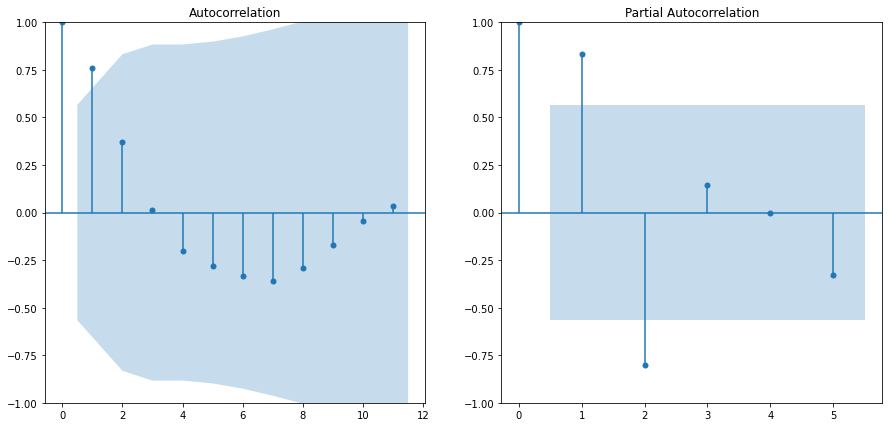

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(diff_reten,lags = 11 , ax=ax[0]) # for q
plot_pacf(diff_reten,lags = 5,ax=ax[1]) # for p
plt.show()

In [18]:
# q = 1
# p = 2


In [19]:
# split the data into train and test
length = int(0.9 * len(diff_reten))
train1 = diff_reten.iloc[:length]
test1 = diff_reten.iloc[length:]
print("train = {}, test = {}".format(len(train1), len(test1)))

train = 10, test = 2


In [20]:
d=0; #ARMA 
lis=[]
for p in range(3):
    for q in range(2):
        lis.append((p,d,q))

# building model
model=[]
for i in lis:
    m = ARIMA(diff_reten, order=i).fit() # d=0 becomes ARMA
    model.append(m)

# checking model is good or not
c=1
for i in model:
    pvalue = sm.stats.acorr_ljungbox(i.resid, lags=[1], return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print(f'Model {c} Not a good model')
    else:
        print(f'Model {c} Good model')
    c+=1

Model 1 Not a good model
Model 2 Not a good model
Model 3 Good model
Model 4 Good model
Model 5 Good model
Model 6 Good model


In [21]:
# calculating AIC and BIC score   
aic=[]
bic=[]
for i in model[0:]:
    aic.append(i.aic)
    bic.append(i.bic)

# predicting values
forecast=[]
for i in model[0:]:
    fcast = i.predict(start=len(train1), end=len(train1)+len(test1)-1)
    forecast.append(fcast)

# calculating MSE and RMSE score
MSE = []
RMSE = []
for i in forecast:
    mse = mean_squared_error(test1, i)
    rmse = np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)

# printing model numbers
model_no=[]
for i in range(0,len(model)):
    model_no.append('Model '+str(i))
    
# dataframe of all results
df_results = pd.DataFrame({'Model No.': model_no, '(p, d, q)':lis[0:], 'AIC': aic, 'BIC': bic, 'MSE': MSE, 'RMSE': RMSE})
df_results

,Model No.,"(p, d, q)",AIC,BIC,MSE,RMSE
0,Model 0,"(0, 0, 0)",261.016249,261.986063,5.654203e+07,7519.443634
1,Model 1,"(0, 0, 1)",252.040356,253.495075,5.469495e+06,2338.695140
2,Model 2,"(1, 0, 0)",251.851519,253.306239,8.442921e+07,9188.537116
3,Model 3,"(1, 0, 1)",247.957514,249.897141,4.410651e+07,6641.273256
4,Model 4,"(2, 0, 0)",241.875991,243.815617,1.070579e+07,3271.970482
5,Model 5,"(2, 0, 1)",243.761456,246.185989,1.045919e+07,3234.067188


In [22]:
print('Taking model with lowest RMSE score:')
df_results[df_results.RMSE==df_results.RMSE.min()]


Taking model with lowest RMSE score:


,Model No.,"(p, d, q)",AIC,BIC,MSE,RMSE
1,Model 1,"(0, 0, 1)",252.040356,253.495075,5.469495e+06,2338.69514


In [23]:
p=0;q=1

m1 = ARIMA(train1,order=(p,0,q)).fit()

In [24]:
start = len(train1) 
end = len(train1)+len(test1)-1 

In [25]:
f1 = m1.predict(start,end)
dfres=pd.DataFrame({'actual':test1, 'forecast':f1.values})
dfres

,actual,forecast
year,,
2016,22045.0,23285.136917
2017,7945.0,11952.417076


In [26]:
dfres['error'] = dfres.actual - dfres.forecast
dfres.head()

,actual,forecast,error
year,,,
2016,22045.0,23285.136917,-1240.136917
2017,7945.0,11952.417076,-4007.417076


In [27]:

mse1 = mean_squared_error(dfres.actual, dfres.forecast) #on test data
mse1

8798665.595041221

In [28]:
rmse1 = np.sqrt(mse1)
rmse1

2966.2544724013856

Text(0.5, 1.0, 'ARMA model')

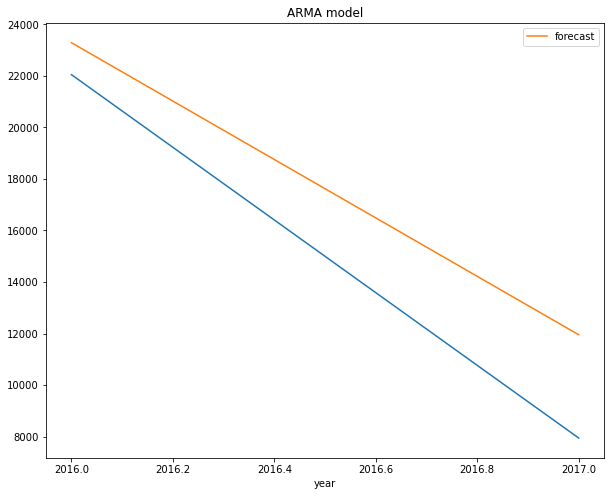

In [29]:
dfres.actual.plot(figsize=(10,8))
dfres.forecast.plot(legend=True)
plt.title("ARMA model")

In [30]:
a = diff_reten.index[-1]
a

2017

In [31]:
n_steps = 3 # number of steps to forecast (3 years with monthly data)
start_index = diff_reten.index[-1]
end_index = start_index + n_steps
future_predictions = m1.predict(start=start_index, end=end_index)
diff_reten1 = diff_reten.append(future_predictions)
diff_reten1

2006     2131.000000
2007     3450.000000
2008     3155.000000
2009     3770.000000
2010     3998.000000
2011     5652.000000
2012    10456.000000
2013    23854.000000
2014    30448.000000
2015    31653.000000
2016    22045.000000
2017     7945.000000
2017    11952.417076
2018    11952.417076
2019    11952.417076
2020    11952.417076
dtype: float64

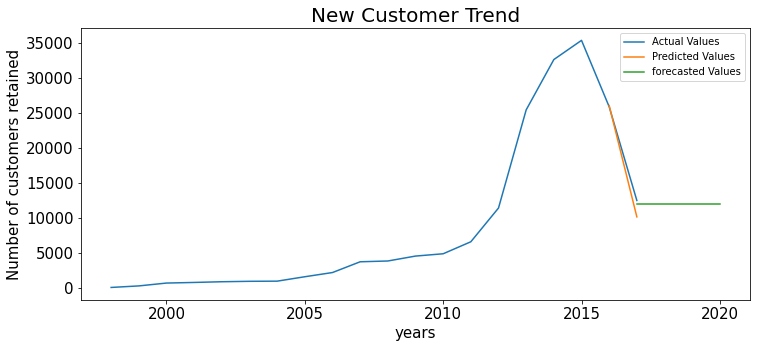

In [32]:
plt.title("New Customer Trend", size = 20)
#dfres.forecast.plot(legend=True)
reten.plot(figsize=(12,5),label  = "Actual Values")
#diff_reten1.plot(figsize=(12,5), color = 'b')
fcast.plot(figsize=(12,5),label  = "Predicted Values")
future_predictions.plot(figsize=(12,5),label  = "forecasted Values")
plt.legend()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("years", size = 15)
plt.ylabel("Number of customers retained", size = 15)
plt.show()

# Conclusion: 
## The number of new customer for next year will remain constant at 11952 each year